Mask not found: dense_data/abyss/bomb/mask_0100.png
Mask not found: dense_data/abyss/pickup/mask_0100.png
Mask not found: dense_data/abyss/projectile/mask_0100.png
Name: 0100
Road: abyss
Masks:
  - 0100_frame (Path: dense_data/abyss/frame/frame_0100.png, Has Mask: True)
  - 0100_kart (Path: dense_data/abyss/kart/mask_0100.png, Has Mask: True)
  - 0100_nitro (Path: dense_data/abyss/nitro/mask_0100.png, Has Mask: True)
  - 0100_background (Path: dense_data/abyss/background/mask_0100.png, Has Mask: True)
  - 0100_bomb (Path: dense_data/abyss/bomb/mask_0100.png, Has Mask: False)
  - 0100_pickup (Path: dense_data/abyss/pickup/mask_0100.png, Has Mask: False)
  - 0100_projectile (Path: dense_data/abyss/projectile/mask_0100.png, Has Mask: False)
  - 0100_track (Path: dense_data/abyss/track/mask_0100.png, Has Mask: True)
  - 0100_combined (Path: dense_data/abyss/combined/mask_combined_0100.png, Has Mask: True)


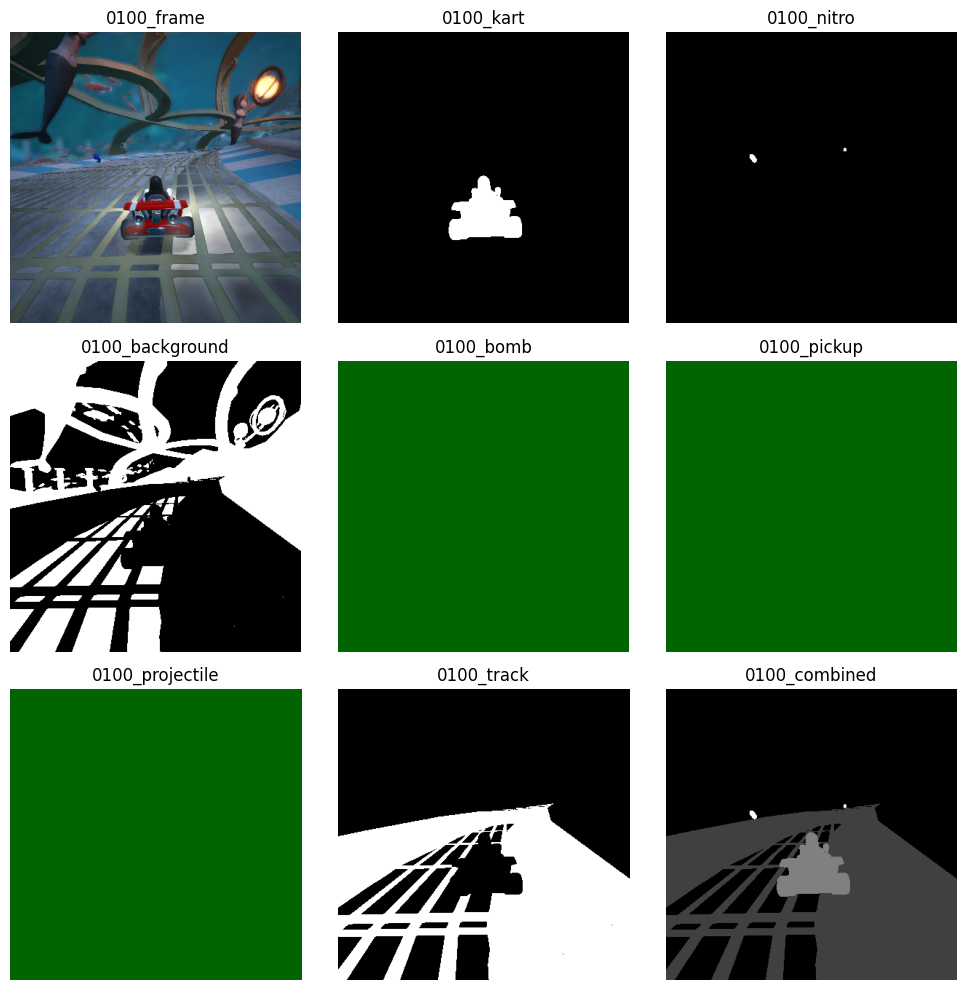

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from PIL import Image

class kart_frame:
    def __init__ (self, name, road):
        self.name = name
        self.road = road
        self.base_path = "dense_data/{}/{}/{}_{}.png"
        self.masks = []
        self.images = []
        self.load_masks()
            
    def load_masks(self):
        frames = ["frame","kart","nitro","background","bomb","pickup","projectile","track","combined"]
        
        for frame in frames:
            mask = {}
            image_prefix = "mask"
            
            if(frame == "frame"):
                image_prefix = "frame"
            elif(frame == "combined"):
                image_prefix="mask_combined"

            image_path = self.base_path.format(self.road, frame, image_prefix, self.name)

            mask[frame] = image_path
            if not os.path.exists(image_path):
                print(f"Mask not found: {image_path}")
                mask["hasMask"] = False
                mask["image"] = Image.new("RGB", (256, 256), color=(0, 100, 0)) 
            else:
                mask["hasMask"] = True
                mask["image"] = Image.open(image_path)

            mask["name"] = self.name
            mask["road"] = self.road
            mask["mask_name"] = f"{self.name}_{frame}"
            mask["image_prefix"] = image_prefix
            mask["image_path"] = image_path
            mask["frame"] = frame
            
            self.masks.append(mask)

    def print_info(self):
        print(f"Name: {self.name}")
        print(f"Road: {self.road}")
        print("Masks:")
        for mask in self.masks:
            print(f"  - {mask['mask_name']} (Path: {mask['image_path']}, Has Mask: {mask['hasMask']})")

    def print_masks(self):
        fig, ax = plt.subplots(3,3,figsize=(10, 10))

        index = 0
        for i in range(3):
            for j in range(3):        
                img = self.masks[index]["image"]#images[index]
                name = self.masks[index]["mask_name"]#names[index]
                ax[i][j].imshow(img, cmap="gray")
                ax[i][j].axis('off')
                ax[i][j].set_title(name)
                index += 1
                
        plt.tight_layout()
        plt.show()

    def ensure_grayscale(self, img):
        """
        Devuelve una versión en escala de grises de una imagen.
        Si ya está en escala de grises, la devuelve tal cual.
        """
        img_array = np.array(img)

        if len(img_array.shape) == 2:
            return img_array  # Ya es gris
        elif len(img_array.shape) == 3 and img_array.shape[2] == 3:
            return rgb2gray(img_array)
        else:
            raise ValueError(f"Formato de imagen no soportado: {img_array.shape}")

    def get_similar_mask(self, mask_to_compare):

        similarity = 0
        similar_mask = None
        gray_mask_to_compare = self.ensure_grayscale(mask_to_compare)
        binary_mask_to_compare = gray_mask_to_compare > 0.5
        
        for mask in self.masks:
            print(mask)
            if not mask["hasMask"]:
                continue

            #local_gray_mask = rgb2gray(mask["image"])
            local_gray_mask = self.ensure_grayscale(mask["image"])
            binary_mask_local = local_gray_mask > 0.5

            print(f"Comparing with mask: {mask['mask_name']}")
            current_similarity = np.sum(binary_mask_to_compare == binary_mask_local) / mask_to_compare.size
            if current_similarity > similarity:
                similarity = current_similarity
                similar_mask = mask["image"]

        return similarity, similar_mask
                

frame = kart_frame("0100", "abyss")
frame.print_info()  
frame.print_masks()

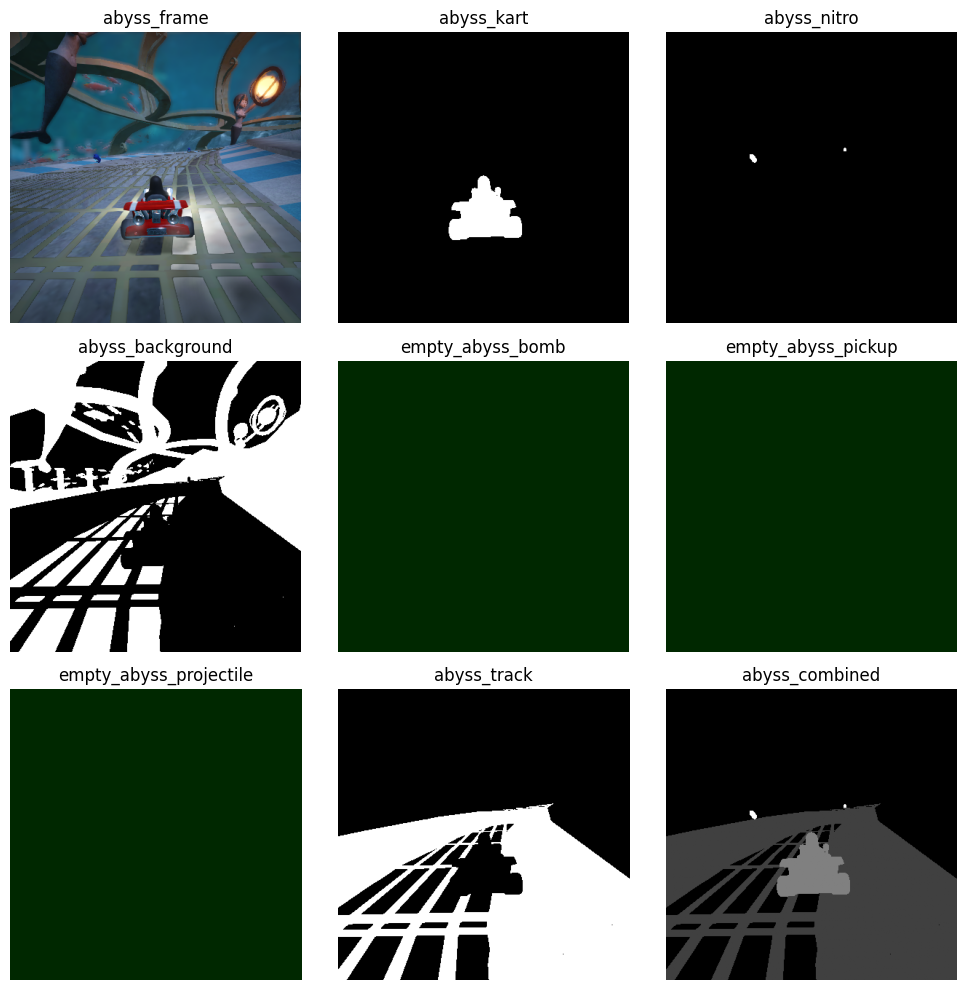

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

images_path = []

def show_image_and_mask(name):
    roads = ["abyss"]
    frames = ["frame","kart","nitro","background","bomb","pickup","projectile","track","combined"]
    base_path = "dense_data/{}/{}/{}_{}.png"
    images = []
    names = []
    images_path = []

    for road in roads:
        for frame in frames:
            image_prefix = "mask"
            
            if(frame == "frame"):
                image_prefix = "frame"
            elif(frame == "combined"):
                image_prefix="mask_combined"

            image_path = base_path.format(road, frame, image_prefix, name)
            images_path.append(image_path)
            #print(f"Loading image from: {image_path}")

            if not os.path.exists(image_path):
                #print(f"Image not found: {image_path}")
                image = Image.new("RGB", (256, 256), color=(0, 40, 0))
                images.append(image)
                names.append(f"empty_{road}_{frame}")
                continue

            image = Image.open(image_path)
            ancho, alto = image.size
            images.append(image)
            names.append(f"{road}_{frame}")


    fig, ax = plt.subplots(3,3,figsize=(10, 10))

    index = 0
    for i in range(3):
        for j in range(3):        
            img = images[index]
            name = names[index]
            ax[i][j].imshow(img, cmap="gray")
            ax[i][j].axis('off')
            ax[i][j].set_title(name)
            index += 1
            
    plt.tight_layout()
    plt.show()
    return images_path

name = "0100" 
images_path = show_image_and_mask(name)

In [4]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import v2

class SuperTuxKartDataset(Dataset):
    def __init__(self, root_dir, tracks, transform_img=None, transform_mask=None):
        if isinstance(tracks, str):
            tracks = [tracks]

        self.image_paths = []
        self.mask_paths = []

        for track in tracks:
            image_dir = os.path.join(root_dir, track, "frame")
            mask_dir = os.path.join(root_dir, track, "combined")

            image_files = sorted([
                f for f in os.listdir(image_dir) if f.endswith(".png")
            ])
            mask_files = sorted([
                f for f in os.listdir(mask_dir) if f.endswith(".png")
            ])

            assert len(image_files) == len(mask_files), f"Track '{track}' tiene distinto número de imágenes y máscaras."

            for img_file, mask_file in zip(image_files, mask_files):
                self.image_paths.append(os.path.join(image_dir, img_file))
                self.mask_paths.append(os.path.join(mask_dir, mask_file))

        self.transform_img = transform_img
        self.transform_mask = transform_mask

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]

        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path)

        if self.transform_img:
            image = self.transform_img(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)
        else:
            mask = torch.from_numpy(np.array(mask)).long()

        return image, mask

In [5]:
from collections import Counter

def get_class_name(index):
    class_names = [
        "Background", "Track", "Kart", "Pickup", "Nitro", "Bomb", "Projectile"
    ]
    if 0 <= index < len(class_names):
        return class_names[index]
    else:
        return "Unknown Class"

def contar_clases_dataset(dataset):
    contador = Counter()

    for _, mask in dataset:
        if mask.ndim == 3 and mask.shape[0] == 1:
            mask = mask.squeeze(0)
        valores, conteos = torch.unique(mask, return_counts=True)
        for val, count in zip(valores.tolist(), conteos.tolist()):
            contador[val] += count

    print("Distribución de clases en el dataset:")
    for clase, cantidad in sorted(contador.items()):
        print(f"Clase { get_class_name(clase)}: {cantidad} píxeles")

    return contador

def tiene_clase_rara(mask):
  clases_raras = {3, 4, 5, 6}
  return any(c in clases_raras for c in torch.unique(mask).tolist())

def get_rare_sample(dataset):
  rare_samples = [dataset[i] for i in range(len(dataset)) if tiene_clase_rara(dataset[i][1])]
  return rare_samples

Imagen: torch.Size([3, 224, 224]), Máscara: torch.Size([1, 224, 224]), Clases: tensor([0, 1, 2, 4])


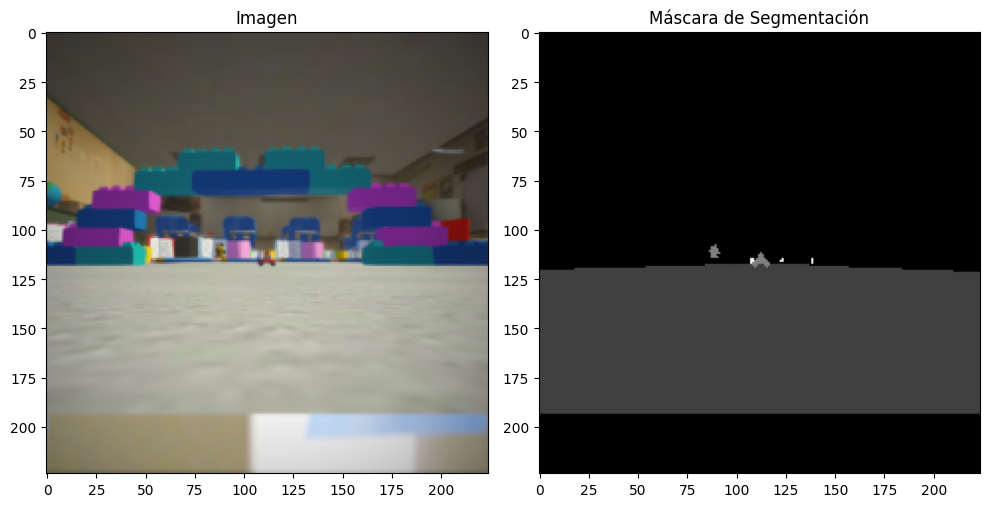

In [6]:
from torchvision.transforms import v2
from torch.utils.data import DataLoader, random_split
from torch.utils.data import ConcatDataset

CMAP="gray"

transform_img_old = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.CenterCrop(400),
    v2.Resize((224, 224))
])

transform_mask = v2.Compose([
    v2.ToImage(),
    v2.CenterCrop(400),
    v2.Resize((224, 224), interpolation=Image.NEAREST),
    v2.ToDtype(torch.int64)
])

tracks = ["olivermath", "abyss", "gran_paradiso_island", "lighthouse","volcano_island","hacienda"]

dataset = SuperTuxKartDataset(
    root_dir="dense_data",
    tracks=tracks,
    transform_img=transform_img_old,
    transform_mask=transform_mask
)

rare_samples = get_rare_sample(dataset)
augmented_dataset = ConcatDataset([dataset] + [rare_samples] * 50)

train_size = int(0.8 * len(augmented_dataset))
test_size = len(augmented_dataset) - train_size
train_dataset, test_dataset = random_split(augmented_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_dataset, batch_size=180, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=180, shuffle=False)

img, mask = dataset[0]
print(f"Imagen: {img.shape}, Máscara: {mask.shape}, Clases: {torch.unique(mask)}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img.permute(1, 2, 0).cpu().numpy())
plt.title("Imagen")

plt.subplot(1, 2, 2)
plt.imshow(mask.squeeze().cpu().numpy(), cmap=CMAP)
plt.title("Máscara de Segmentación")

plt.tight_layout()
plt.show()

In [7]:
!pip3 install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/mt/ynd178zj0lsf9_dhk8rpqy200000gn/T/pip-req-build-xmk28_a9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/mt/ynd178zj0lsf9_dhk8rpqy200000gn/T/pip-req-build-xmk28_a9
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


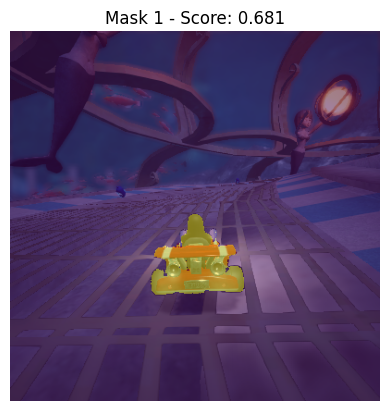

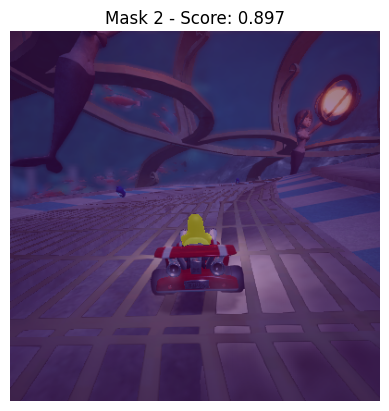

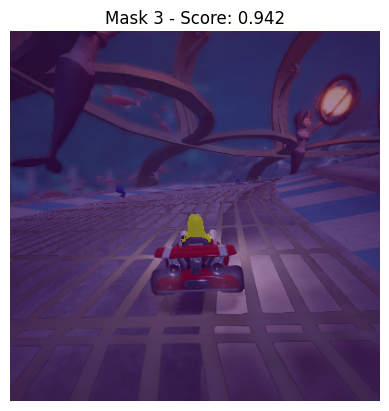

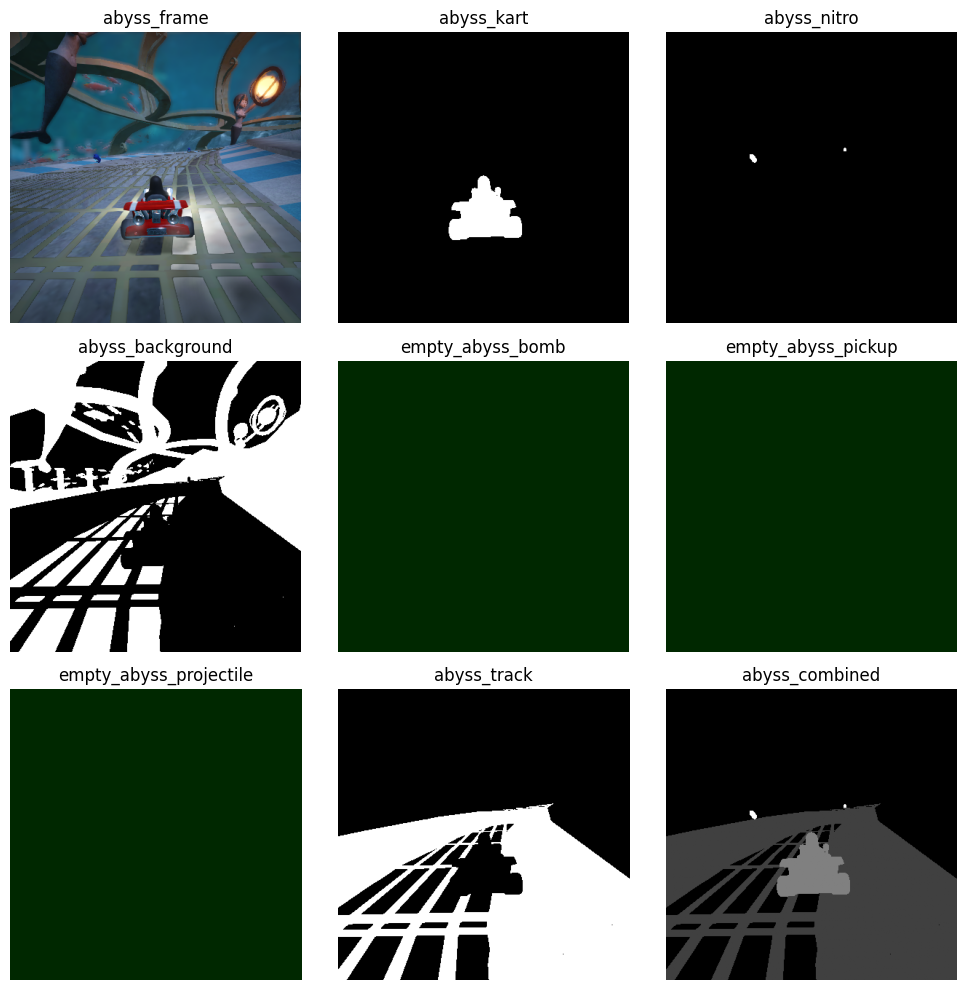

['dense_data/abyss/frame/frame_0100.png',
 'dense_data/abyss/kart/mask_0100.png',
 'dense_data/abyss/nitro/mask_0100.png',
 'dense_data/abyss/background/mask_0100.png',
 'dense_data/abyss/bomb/mask_0100.png',
 'dense_data/abyss/pickup/mask_0100.png',
 'dense_data/abyss/projectile/mask_0100.png',
 'dense_data/abyss/track/mask_0100.png',
 'dense_data/abyss/combined/mask_combined_0100.png']

In [8]:
import torch
import matplotlib.pyplot as plt
import cv2
from segment_anything import sam_model_registry, SamPredictor

image_path = images_path[0]  
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)
predictor.set_image(image)

# Punto de entrada manual para segmentación (ej: centro de la imagen)
#input_point = [[image.shape[1] // 2, image.shape[0] // 2]]  # [x, y]
import numpy as np
input_point = np.array([[image.shape[1] // 2, image.shape[0] // 2]])  # [x, y]

input_label = [1]  # foreground

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

# Mostrar la máscara
for i, mask in enumerate(masks):
    plt.figure()
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.title(f"Mask {i+1} - Score: {scores[i]:.3f}")
    plt.axis("off")
plt.show()

show_image_and_mask(name)

Mask not found: dense_data/abyss/bomb/mask_0100.png
Mask not found: dense_data/abyss/pickup/mask_0100.png
Mask not found: dense_data/abyss/projectile/mask_0100.png
Name: 0100
Road: abyss
Masks:
  - 0100_frame (Path: dense_data/abyss/frame/frame_0100.png, Has Mask: True)
  - 0100_kart (Path: dense_data/abyss/kart/mask_0100.png, Has Mask: True)
  - 0100_nitro (Path: dense_data/abyss/nitro/mask_0100.png, Has Mask: True)
  - 0100_background (Path: dense_data/abyss/background/mask_0100.png, Has Mask: True)
  - 0100_bomb (Path: dense_data/abyss/bomb/mask_0100.png, Has Mask: False)
  - 0100_pickup (Path: dense_data/abyss/pickup/mask_0100.png, Has Mask: False)
  - 0100_projectile (Path: dense_data/abyss/projectile/mask_0100.png, Has Mask: False)
  - 0100_track (Path: dense_data/abyss/track/mask_0100.png, Has Mask: True)
  - 0100_combined (Path: dense_data/abyss/combined/mask_combined_0100.png, Has Mask: True)


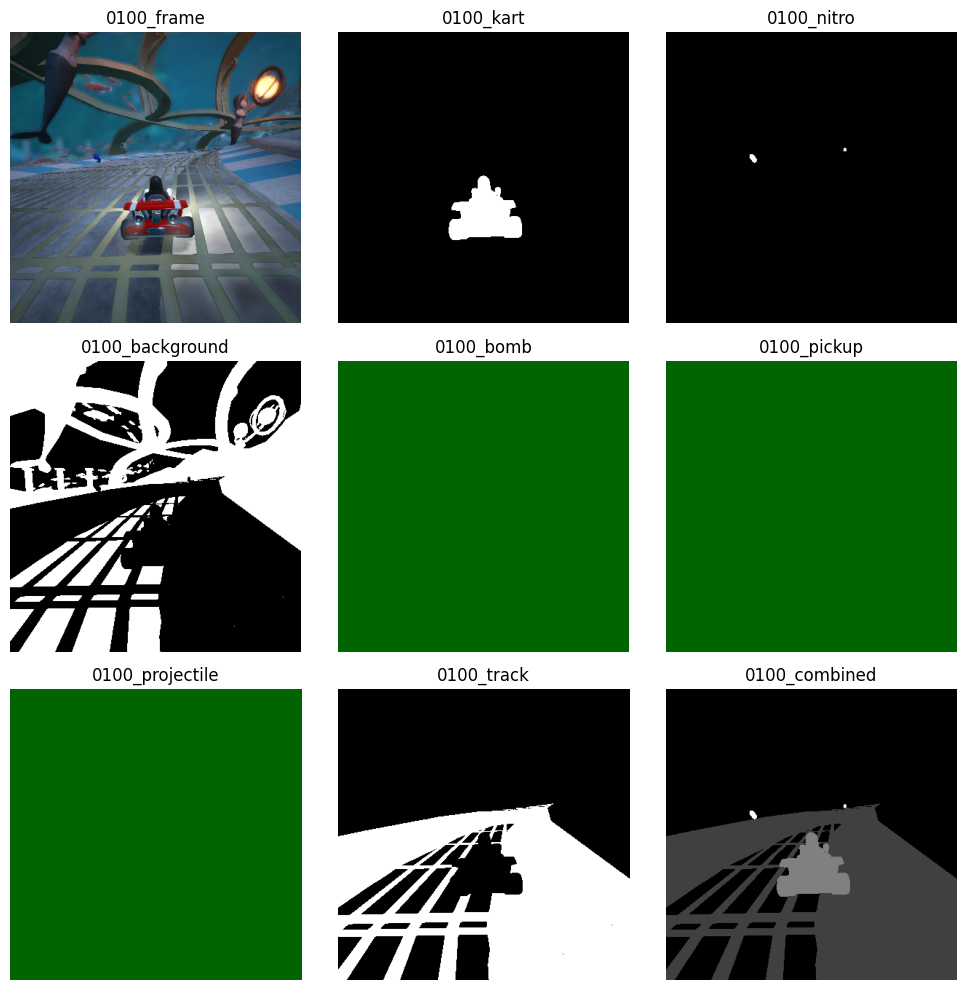

{'frame': 'frame', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x400 at 0x36FD623D0>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_frame', 'image_prefix': 'frame', 'image_path': 'dense_data/abyss/frame/frame_0100.png'}
Comparing with mask: 0100_frame
{'kart': 'dense_data/abyss/kart/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x317EA7C50>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_kart', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/kart/mask_0100.png', 'frame': 'kart'}
Comparing with mask: 0100_kart
{'nitro': 'dense_data/abyss/nitro/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x32DDBED90>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_nitro', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/nitro/mask_0100.png', 'frame': 'nitro'}
Comparing with mask: 0100_nitro
{'background': 'dense_data/abys

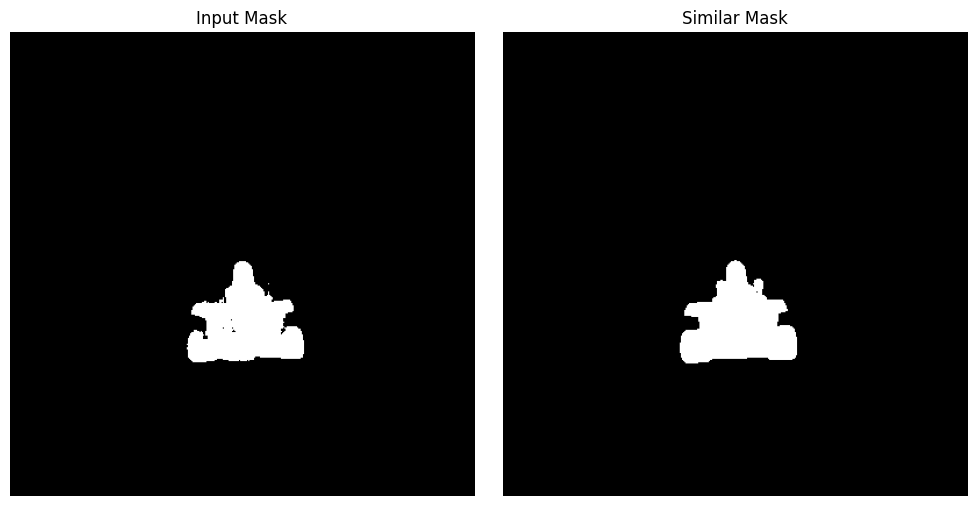

{'frame': 'frame', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x400 at 0x36FD623D0>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_frame', 'image_prefix': 'frame', 'image_path': 'dense_data/abyss/frame/frame_0100.png'}
Comparing with mask: 0100_frame
{'kart': 'dense_data/abyss/kart/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x317EA7C50>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_kart', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/kart/mask_0100.png', 'frame': 'kart'}
Comparing with mask: 0100_kart
{'nitro': 'dense_data/abyss/nitro/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x32DDBED90>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_nitro', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/nitro/mask_0100.png', 'frame': 'nitro'}
Comparing with mask: 0100_nitro
{'background': 'dense_data/abys

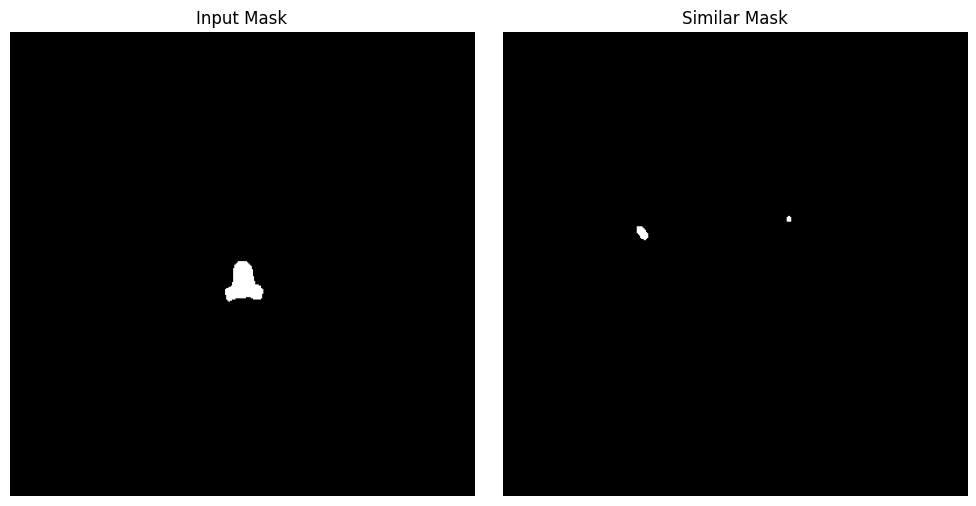

{'frame': 'frame', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x400 at 0x36FD623D0>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_frame', 'image_prefix': 'frame', 'image_path': 'dense_data/abyss/frame/frame_0100.png'}
Comparing with mask: 0100_frame
{'kart': 'dense_data/abyss/kart/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x317EA7C50>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_kart', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/kart/mask_0100.png', 'frame': 'kart'}
Comparing with mask: 0100_kart
{'nitro': 'dense_data/abyss/nitro/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x32DDBED90>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_nitro', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/nitro/mask_0100.png', 'frame': 'nitro'}
Comparing with mask: 0100_nitro
{'background': 'dense_data/abys

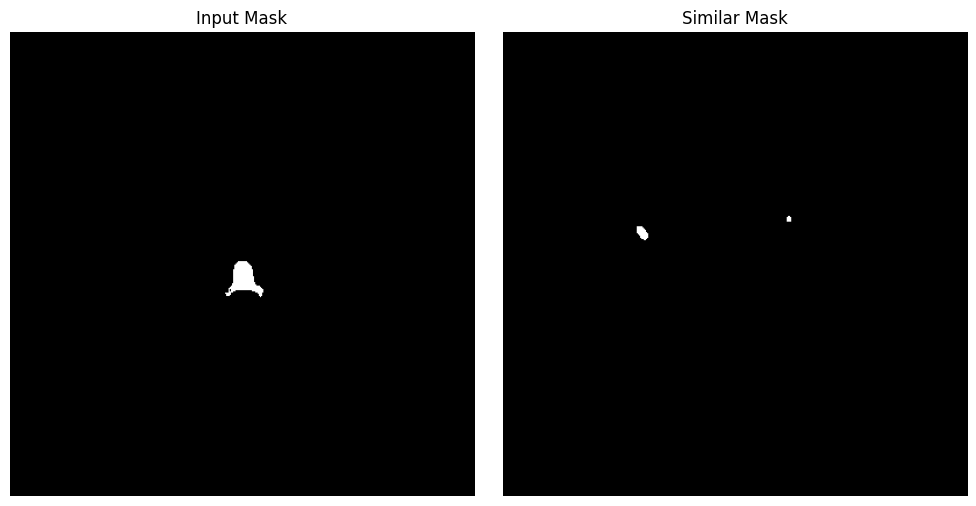

In [9]:
frame = kart_frame("0100", "abyss")
frame.print_info()  
frame.print_masks()

for mask in masks:
   
    similarity, similar_mask = frame.get_similar_mask(mask)

    print(f"Similarity: {similarity:.3f}")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(mask, cmap="gray")
    plt.title("Input Mask")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(similar_mask, cmap="gray")
    plt.title("Similar Mask")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


In [10]:
!pip install peft


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision.transforms import v2
from PIL import Image
import math
from segment_anything import sam_model_registry

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"
num_classes = 7  
batch_size = 1   
epochs = 10

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
sam.eval()
image_encoder = sam.image_encoder

# --- Paso 2: LoRA Manual ---
class LoRALinear(nn.Module):
    def __init__(self, original_linear, r=8, alpha=16):
        super().__init__()
        self.original = original_linear
        self.r = r
        self.alpha = alpha

        in_features = original_linear.in_features
        out_features = original_linear.out_features

        self.lora_down = nn.Linear(in_features, r, bias=False)
        self.lora_up = nn.Linear(r, out_features, bias=False)

        self.scaling = alpha / r

        nn.init.kaiming_uniform_(self.lora_down.weight, a=math.sqrt(5))
        nn.init.zeros_(self.lora_up.weight)

    def forward(self, x):
        return self.original(x) + self.scaling * self.lora_up(self.lora_down(x))

def inject_lora_into_sam_old(sam, r=8, alpha=16):
    for name, module in sam.image_encoder.named_modules():
        if hasattr(module, 'qkv') and isinstance(module.qkv, nn.Linear):
            print(f"Inyectando LoRA en: {name}.qkv")
            module.qkv = LoRALinear(module.qkv, r=r, alpha=alpha)

def inject_lora_into_sam(sam, r=8, alpha=16, target_blocks=[8,9,10,11]):
    for name, module in sam.image_encoder.named_modules():
        for block_idx in target_blocks:
            if name == f"blocks.{block_idx}.attn" and hasattr(module, 'qkv') and isinstance(module.qkv, nn.Linear):
                print(f"Inyectando LoRA en: {name}.qkv")
                module.qkv = LoRALinear(module.qkv, r=r, alpha=alpha)

inject_lora_into_sam(sam)

class SAMLoRASegmentation(nn.Module):
    def __init__(self, encoder, num_classes):
        super().__init__()
        self.encoder = encoder
        self.decoder = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=4),
            nn.Conv2d(128, num_classes, kernel_size=1)
        )

    def forward(self, x):
        embeddings = self.encoder(x)
        return self.decoder(embeddings)

model = SAMLoRASegmentation(sam.image_encoder, num_classes).to(device)

# --- Paso 4: Dataset y transformaciones ---
# SAM usa normalización estilo ImageNet
mean = torch.tensor([123.675, 116.28, 103.53]) / 255.0
std = torch.tensor([58.395, 57.12, 57.375]) / 255.0

transform_img = v2.Compose([
    v2.ToImage(),
    v2.Resize((1024, 1024)),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=mean.tolist(), std=std.tolist())
])

transform_mask = v2.Compose([
    v2.ToImage(),
    v2.Resize((256, 256), interpolation=Image.NEAREST),
    v2.ToDtype(torch.int64)
])

# Cargar SuperTuxKartDataset (asumes que ya está definido)
tracks = ["olivermath", "abyss", "gran_paradiso_island", "lighthouse", "volcano_island", "hacienda"]

dataset = SuperTuxKartDataset(
    root_dir="dense_data",
    tracks=tracks,
    transform_img=transform_img,
    transform_mask=transform_mask
)

rare_samples = get_rare_sample(dataset)
augmented_dataset = ConcatDataset([dataset] + [rare_samples] * 50)

train_size = int(0.8 * len(augmented_dataset))
test_size = len(augmented_dataset) - train_size
train_dataset, test_dataset = random_split(augmented_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# --- Paso 5: Entrenamiento ---

# Solo entrenamos LoRA y decoder
for name, param in model.named_parameters():
    if "lora" not in name.lower() and "decoder" not in name:
        param.requires_grad = False

optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

for epoch in range(epochs):
    print("----"* 20)
    print(f"Epoch {epoch+1}/{epochs}")
    model.train()
    total_loss = 0
    counting = 0
    for images, masks in train_loader:
        
        images, masks = images.to(device), masks.to(device)
        preds = model(images)
        loss = F.cross_entropy(preds, masks.squeeze(1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        counting += 1
        if counting % 10 == 0:
            print(f"Batch size: {counting + 1} / {len(train_loader)}")
            print(f"Loss: {loss.item():.4f}")
            import time
            print(f"Time: {time.strftime('%H:%M:%S', time.gmtime())}")


    print(f"[{epoch+1}/{epochs}] Loss: {total_loss:.4f}")

Inyectando LoRA en: blocks.8.attn.qkv
Inyectando LoRA en: blocks.9.attn.qkv
Inyectando LoRA en: blocks.10.attn.qkv
Inyectando LoRA en: blocks.11.attn.qkv
--------------------------------------------------------------------------------
Epoch 1/10
Batch size: 11 / 38000
Loss: 1.7075
Time: 01:45:44
Batch size: 21 / 38000
Loss: 1.4575
Time: 01:46:10
Batch size: 31 / 38000
Loss: 1.2570
Time: 01:46:36
Batch size: 41 / 38000
Loss: 0.9216
Time: 01:47:04
Batch size: 51 / 38000
Loss: 0.8970
Time: 01:47:29
Batch size: 61 / 38000
Loss: 0.5532
Time: 01:47:54
Batch size: 71 / 38000
Loss: 0.6153
Time: 01:48:21
Batch size: 81 / 38000
Loss: 0.5273
Time: 01:48:47
Batch size: 91 / 38000
Loss: 0.3264
Time: 01:49:13
Batch size: 101 / 38000
Loss: 0.3906
Time: 01:49:40
Batch size: 111 / 38000
Loss: 0.4838
Time: 01:50:05
Batch size: 121 / 38000
Loss: 0.3516
Time: 01:50:31
Batch size: 131 / 38000
Loss: 0.1563
Time: 01:50:59
Batch size: 141 / 38000
Loss: 0.3753
Time: 01:51:24
Batch size: 151 / 38000
Loss: 0.369

KeyboardInterrupt: 